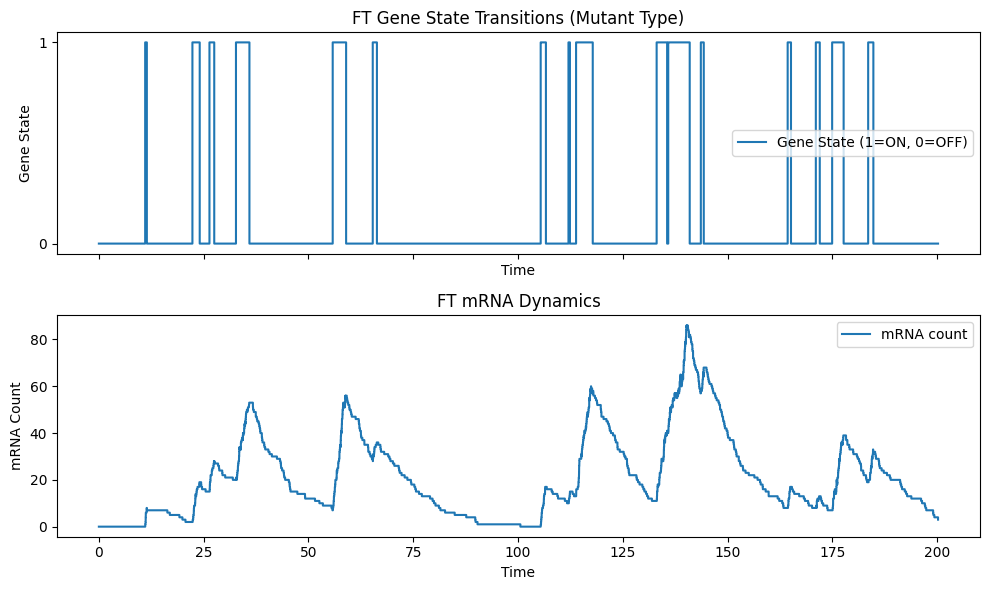

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def run_gillespie(param_dict, initial_state, t_max):

    # Initialization
    k_on = param_dict['k_on']
    k_off = param_dict['k_off']
    k_m = param_dict['k_m']
    g_m = param_dict['g_m']

    # State vector [D_off, D_on, M]
    state = np.array([initial_state['D_off'], initial_state['D_on'], initial_state['M']])

    # Store results
    results_time = [0.0]
    results_state = [state.copy()] # Store the initial state

    time = 0.0

    # Main Simulation Loop
    while time < t_max:

        # Calculate Propensities (a_i)
        D_off, D_on, M = state

        propensities = [
            k_on * D_off,  # a1: D_off -> D_on
            k_off * D_on,  # a2: D_on -> D_off
            k_m * D_on,    # a3: D_on -> D_on + M
            g_m * M        # a4: M -> empty
        ]

        # Calculate Total Propensity (a_0)
        a_0 = sum(propensities)

        # If a_0 is 0, no more reactions can occur
        if a_0 == 0:
            break

        # Calculate when and which reaction would occcur

        # Generate two random numbers
        r1 = np.random.rand()
        r2 = np.random.rand()

        # Calculate time until next reaction
        tau = -np.log(r1) / a_0

        # Choose which reaction occurs

        reaction_sum = 0.0
        reaction_fired = -1

        for i, a_i in enumerate(propensities):
            reaction_sum += a_i
            if r2 * a_0 < reaction_sum:
                reaction_fired = i
                break

        # Update time
        time += tau

        # Update state based on which reaction fired
        if reaction_fired == 0:   # D_off -> D_on
            state[0] -= 1  # D_off
            state[1] += 1  # D_on
        elif reaction_fired == 1: # D_on -> D_off
            state[0] += 1
            state[1] -= 1
        elif reaction_fired == 2: # D_on -> D_on + M
            state[2] += 1  # M
        elif reaction_fired == 3: # M -> empty
            state[2] -= 1

        # Store Results
        results_time.append(time)
        results_state.append(state.copy())

    return np.array(results_time), np.array(results_state)

# Parameters
params = {
    'k_on': 0.1,    # Rate of gene turning ON
    'k_off': 0.5,   # Rate of gene turning OFF
    'k_m': 15.0,    # Transcription rate
    'g_m': 0.1      # mRNA decay rate
}

# Initial state: gene is OFF
init_state = {
    'D_off': 1,
    'D_on': 0,
    'M': 0
}

# Run simulation
time_points, states = run_gillespie(params, init_state, t_max=200)

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot 1: Gene State
gene_state = states[:, 1] # Index 1 is D_on
ax[0].plot(time_points, gene_state, drawstyle='steps-post', label='Gene State (1=ON, 0=OFF)')
ax[0].set_ylabel('Gene State')
ax[0].set_xlabel('Time')
ax[0].set_yticks([0, 1])
ax[0].legend()
ax[0].set_title('FT Gene State Transitions (Mutant Type)')

# Plot 2: mRNA Count
mrna_count = states[:, 2] # Index 2 is M
ax[1].plot(time_points, mrna_count, drawstyle='steps-post', label='mRNA count')
ax[1].set_ylabel('mRNA Count')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].set_title('FT mRNA Dynamics')

plt.tight_layout()
plt.show()